### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= ) 
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='') #막대
- scatter plot : plt.scatter(x, y): #산점도

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [12]:
df=pd.read_csv('dataset/서울교통공사_지하철혼잡도정보_20211231.csv', encoding = 'cp949')
df.head()

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
4,5,평일,1,152,종각,상선,5.2,10.8,9.3,13.6,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1704 non-null   int64  
 1   조사일자    1704 non-null   object 
 2   호선      1704 non-null   int64  
 3   역번호     1704 non-null   int64  
 4   역명      1704 non-null   object 
 5   구분      1704 non-null   object 
 6   5시30분   1704 non-null   float64
 7   6시00분   1704 non-null   float64
 8   6시30분   1704 non-null   float64
 9   7시00분   1704 non-null   float64
 10  7시30분   1704 non-null   float64
 11  8시00분   1704 non-null   float64
 12  8시30분   1704 non-null   float64
 13  9시00분   1704 non-null   float64
 14  9시30분   1704 non-null   float64
 15  10시00분  1704 non-null   float64
 16  10시30분  1704 non-null   float64
 17  11시00분  1704 non-null   float64
 18  11시30분  1704 non-null   float64
 19  12시00분  1704 non-null   float64
 20  12시30분  1704 non-null   float64
 21  13시00분  1704 non-null   float64
 22  

In [24]:
df['19시00분'][(df['역명'] == '이대')]

100     22.8
101     41.6
668     27.0
669     39.9
1236    22.2
1237    29.0
Name: 19시00분, dtype: float64

In [98]:
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'],axis =1, inplace = True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

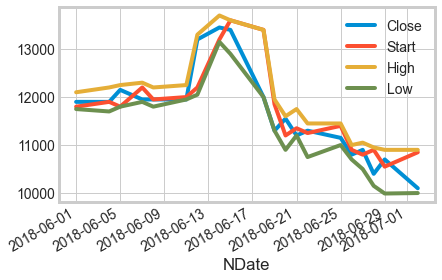

In [99]:
df1.plot()

<AxesSubplot:xlabel='NDate'>

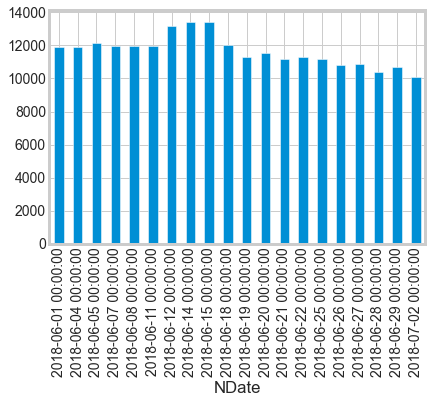

In [100]:
# 막대그래프
ba = df1.Close[::-1].plot(kind='bar')
ba

In [101]:
# Q 6월만을 추출하여 Close 컬럼으로 일별 막대 그래프를 표현하세요.

<AxesSubplot:xlabel='NDate'>

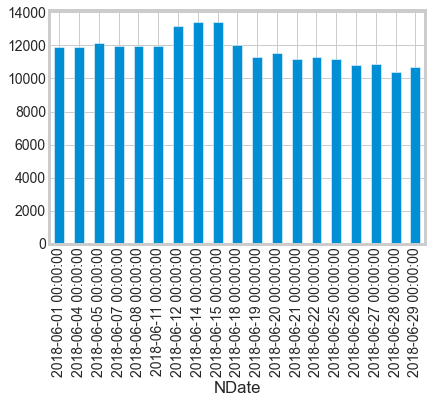

In [102]:
df1.Close.iloc[1:][::-1].plot(kind = 'bar')

<AxesSubplot:xlabel='NDate'>

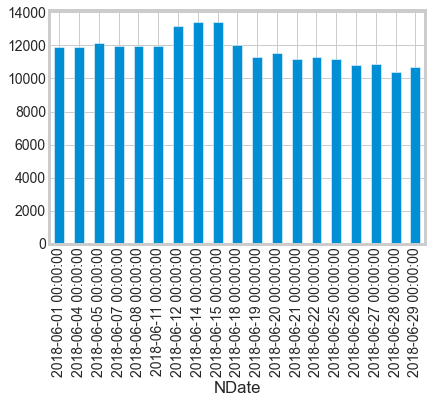

In [103]:
df1.loc['2018-06','Close'][::-1].plot(kind = 'bar')

<AxesSubplot:ylabel='Frequency'>

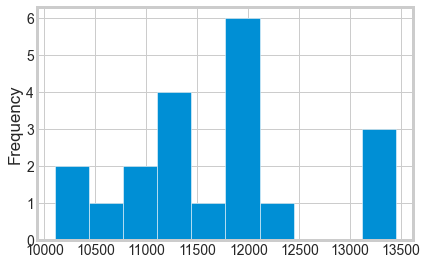

In [104]:
df1.Close.plot(kind = 'hist', bins = 10)#bins > 구간을 얘기함

### 과제(7/6)

- df에서 Volume 컬럼의 분포를 탐색하는 히스토그램을 표현하세요.

<AxesSubplot:ylabel='Frequency'>

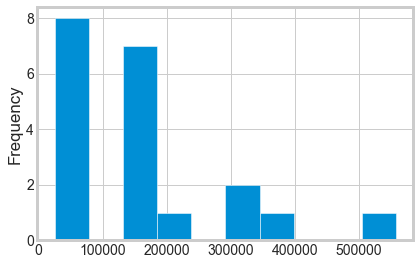

In [105]:
df.Volume.plot(kind = 'hist')

<AxesSubplot:xlabel='Close', ylabel='Volume'>

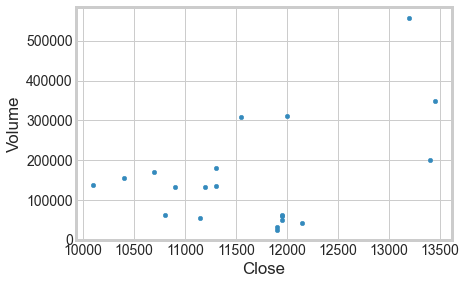

In [106]:
#Close 컬럼과 Volume 컬럼으로 산점도를 표현하세요.(kind = 'scatter')
df.plot(x='Close', y='Volume', kind = 'scatter' )

In [107]:
# 상관관계를 나타냄. 0 = 상관관계가 전무하다. 1 = 상관관계가 높다. -1 = 상관관계가 높다.
df1.corr()


,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


In [108]:
df1.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

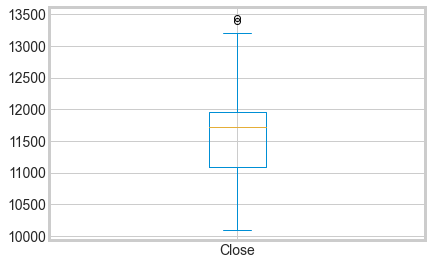

In [109]:
df1.Close.plot(kind = 'box')

### Box_plot 이상치 확인
### Box_plot 의미 확인

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


In [110]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [111]:
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df.Close <= (Q1 - IQR*1.5)) | (df.Close >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


In [112]:
upper_whisker = Q3+IQR*1.5
upper_whisker

13275.0

### 과제(7/7-1)

Start 컬럼의 분포 및 이상치 여부를 탐색하는 Box_Plot 및 이상치를 구하세요.

<AxesSubplot:>

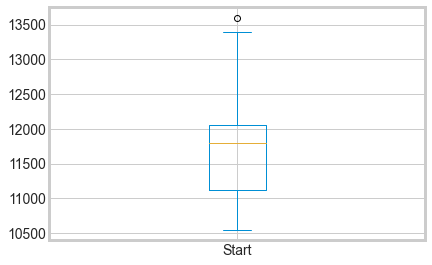

In [113]:
df.Start.plot(kind = "box")

In [114]:
df.Start.describe()

count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64

In [115]:
Q12 = df.Start.describe()['25%']
Q33 = df.Start.describe()['75%']
IQR2 = Q33 - Q12
ab = df[(df.Start <= (Q12 - IQR2*1.5)) | (df.Start >= (Q33+IQR2*1.5))]
ab

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15


In [116]:
%pwd

'C:\\cakd7\\m2_분석라이브러리활용\\visualaztion'

In [117]:
import pandas as pd
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx') #상위폴더의 경로로 올라갈 때, 온점을 하나 더 찍어준다. (..) 
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 과제(7/7-2)
- mpg 컬럼의 대하여 box_plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.
- fish_multi에 대하여 box_plot으로 시각화한 후 이상치 확인 및 그 값을 구하세요.

<AxesSubplot:>

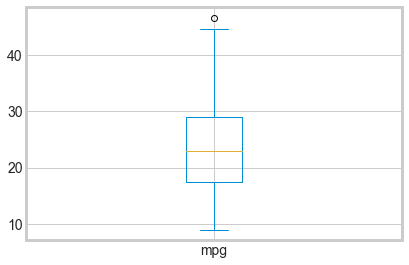

In [120]:
df_auto.mpg.plot(kind = 'box')

In [126]:
#1)
dfd= df_auto.mpg.describe()
dfd

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [168]:
Q1 = dfd["25%"]
Q3 = dfd['75%']
IQR = Q3 - Q1
ab = df_auto[(df_auto.mpg <= (Q1 - IQR*1.5)) | (df_auto.mpg >= (Q3 + IQR*1.5))]
ab #이상치

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


In [214]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  20 non-null     object 
 1   length   20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [145]:
#과제2)

<AxesSubplot:xlabel='species', ylabel='length'>

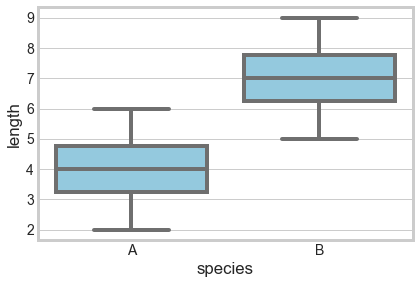

In [146]:
import seaborn as sns
sns.boxplot(x = 'species',y = 'length', data=fish_multi, color = 'skyblue')

In [147]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [216]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 0.5

In [217]:
fish_multi

,species,length
0,A,2.0
1,A,3.0
2,A,3.0
3,A,4.0
4,A,4.0
5,A,10.0
6,A,4.0
7,A,5.0
8,A,5.0
9,A,6.0


In [218]:
fish_mm= fish_multi.copy()
fish_a = fish_mm.set_index("species").loc['A']
fish_b = fish_mm.set_index("species").loc['B']

<AxesSubplot:xlabel='species', ylabel='length'>

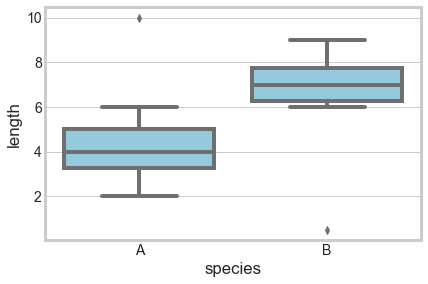

In [207]:
sns.boxplot(x = 'species',y = 'length', data=fish_multi, color = 'skyblue')

In [208]:
fishl = fish_a.length.describe()
fishl

count    10.000000
mean      4.600000
std       2.221111
min       2.000000
25%       3.250000
50%       4.000000
75%       5.000000
max      10.000000
Name: length, dtype: float64

In [209]:
Q1 - IQR*1.5

1.0

In [210]:
Q1 = fishl["25%"]
Q3 = fishl['75%']
IQR = Q3 - Q1
ab = fish_a[(fish_a.length <= (Q1 - IQR*1.5)) | (fish_a.length >= (Q3 + IQR*1.5))]
ab #이상치

,length
species,
A,10.0


In [219]:
fishl = fish_b.length.describe()
fishl

count    10.000000
mean      6.550000
std       2.314807
min       0.500000
25%       6.250000
50%       7.000000
75%       7.750000
max       9.000000
Name: length, dtype: float64

In [220]:
Q1 = fishl["25%"]
Q3 = fishl['75%']
IQR = Q3 - Q1
ab = fish_b[(fish_b.length <= (Q1 - IQR*1.5)) | (fish_b.length >= (Q3 + IQR*1.5))]
ab #이상치

,length
species,
B,0.5


In [156]:
# 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임을 생성해주세요.

<AxesSubplot:ylabel='Frequency'>

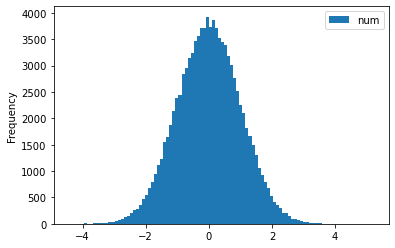

In [39]:
import pandas as pd
import numpy as np
arr = np.random.randn(100000)
df = pd.DataFrame(arr, columns = {"num"})
df.plot(kind = 'hist', bins = 100)

In [40]:
# 평균이 10, 표준편차 2, 샘플 10000

<AxesSubplot:ylabel='Frequency'>

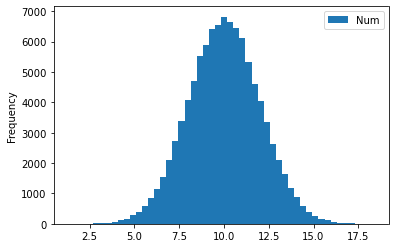

In [41]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10,scale=2,size=100000)
df1 = pd.DataFrame(sample1, columns=['Num'])
df1.plot(kind='hist',bins=50)

In [69]:
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [82]:
plt.style.use('fivethirtyeight')

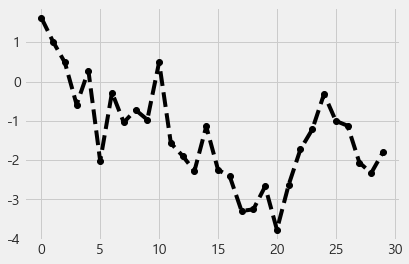

In [83]:
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)
plt.plot(randn(30).cumsum(),linestyle = 'dashed', color ='k', marker ='o')

In [84]:
data = np.random.randn(1000)
print(data[:10])
cdata = data.cumsum()
cdata[:10]

[-0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416]


array([-0.69166075, -1.08841428, -1.77558698, -2.62079262, -3.29203875,
       -3.30470335, -4.4220137 , -4.187598  , -2.52779582, -1.78575166])

Text(0.5, 0, 'Stages')

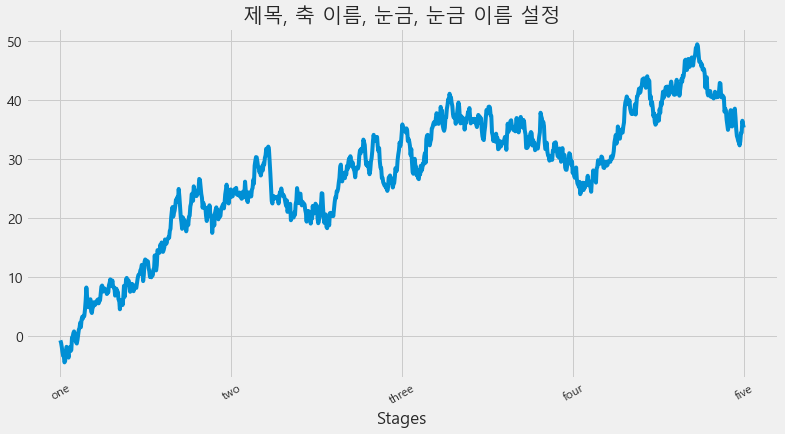

In [85]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc

font_path='dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

fig=plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')

ax.set_title('제목, 축 이름, 눈금, 눈금 이름 설정')
ax.set_xlabel('Stages')

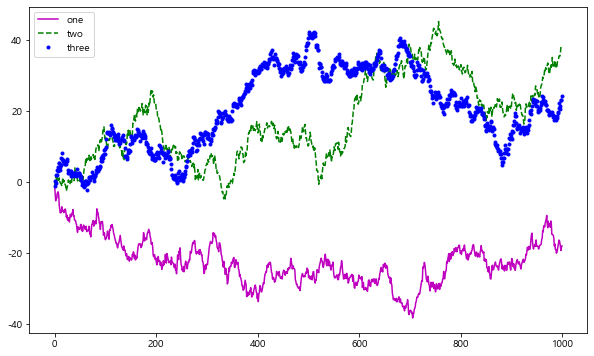

In [69]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'm',label = 'one')
ax.plot(randn(1000).cumsum(), 'g--',label = 'two')
ax.plot(randn(1000).cumsum(), 'b.', label ='three')

plt.legend(loc='best')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

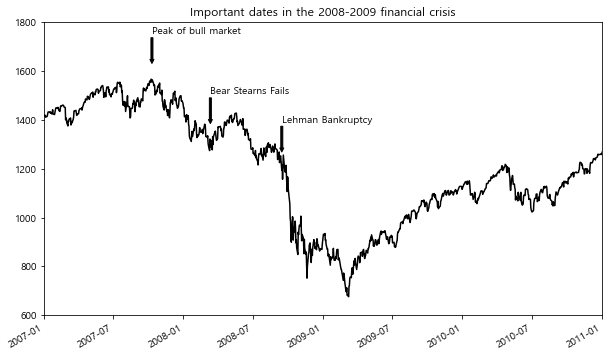

In [70]:
# 주석과 글자는 text, arrow, annotate 함수를 이용하여 추가
from datetime import datetime

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('dataset/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')


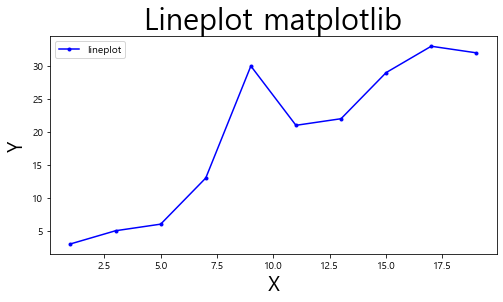

In [74]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize = (8,4))
plt.plot(x,y, color = 'blue', marker ='o', markersize =3)
plt.title('Lineplot matplotlib', size = 30)
plt.xlabel('X', size =20)
plt.ylabel('Y', size = 20)
plt.legend(labels = ['lineplot'])

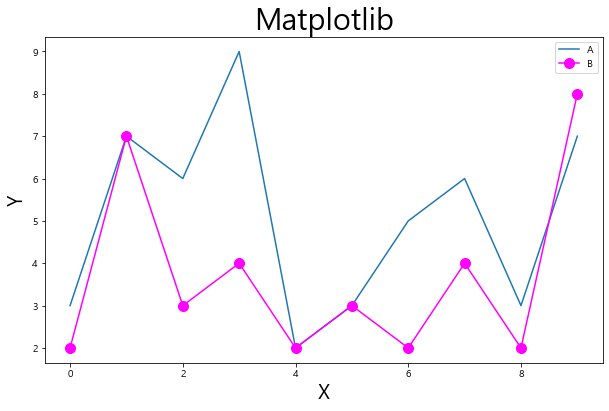

In [80]:
np.random.seed(10)
x = np.arange(10)
y1 = np.random.randint(2,10,size=10)
y2 = np.random.randint(2,10,size=10)
plt.figure(figsize = (10,6))
plt.plot(x,y1)
plt.plot(x,y2, color = 'magenta',marker='o',markersize = 10)
plt.title('Matplotlib', size = 30)
plt.xlabel('X', size =20)
plt.ylabel('Y', size = 20)
plt.legend(labels = ['A','B'])

Text(0.5, 1.0, 'Bar Plot')

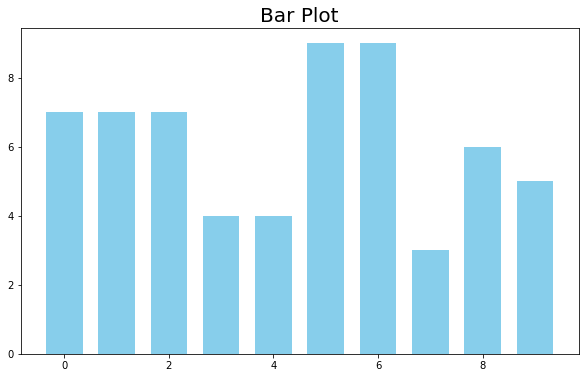

In [2]:
# bar plot(수직 막대)

import matplotlib.pyplot as plt
import numpy as np
y = np.random.randint(2,10,size =10)
x = range(len(y))
plt.figure(figsize = (10,6))
plt.bar(x,y,width = 0.7, color ='skyblue')
plt.title('Bar Plot', size =20)



<AxesSubplot:>

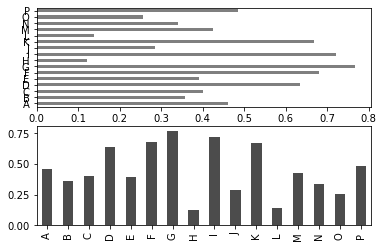

In [4]:
# barh(수평막대)
import pandas as pd
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index = list('ABCDEFGHIJKLMNOP'))
#print(data)

data.plot.bar(ax = axes[1], color ='k', alpha = 0.7)
data.plot.barh(ax = axes[0], color = 'k', alpha = 0.5)

              A         B         C         D
one    0.131201  0.323098  0.500562  0.357920
two    0.290153  0.418369  0.872172  0.782758
three  0.640423  0.884175  0.068093  0.376417
four   0.293359  0.091804  0.815481  0.392329
five   0.690942  0.751648  0.906165  0.085027
six    0.660401  0.711710  0.164883  0.799484


<AxesSubplot:>

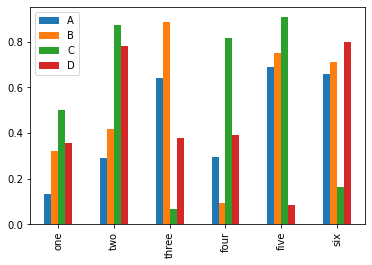

In [13]:
# 각 로우의 값을 묶어서 그룹별 막대그래프로 표현
df = pd.DataFrame(np.random.rand(6,4),
                 index = ['one','two','three','four','five','six'],
                 columns = ['A','B','C','D'])
print(df)
df.plot.bar()

<AxesSubplot:>

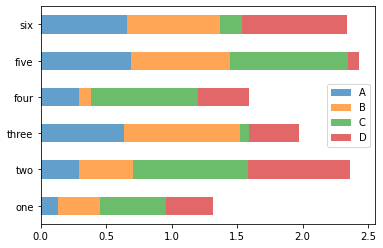

In [14]:
# 누적막대그래프
df.plot.barh(stacked = True, alpha = 0.7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, one to six
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes


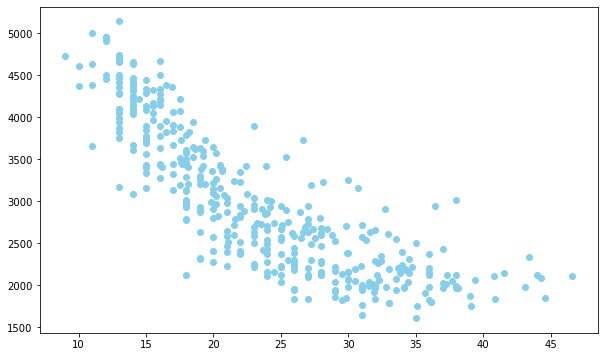

In [23]:
# scatter plot
df_auto = pd.read_excel('../pandas/dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize = (10,6))
plt.scatter(x,y,color = 'skyblue')

In [24]:
df_auto[['mpg','weight','displacement','cylinders']].corr()

,mpg,weight,displacement,cylinders
mpg,1.000000,-0.831741,-0.804203,-0.775396
weight,-0.831741,1.000000,0.932824,0.896017
displacement,-0.804203,0.932824,1.000000,0.950721
cylinders,-0.775396,0.896017,0.950721,1.000000


In [18]:
df_auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

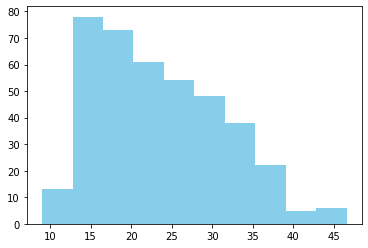

In [25]:
# histogram
plt.hist(x, bins = 10, color = 'skyblue')

<AxesSubplot:>

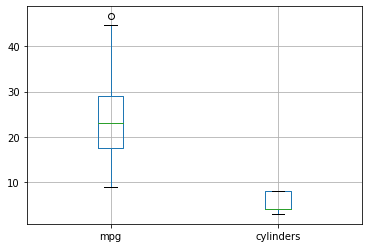

In [26]:
# box_plot
df_auto.boxplot(column = ['mpg','cylinders'])

In [87]:
#seaborn 내장 테마 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('whitegrid')

In [88]:
import seaborn as sns

tips = pd.read_csv('dataset/tips.csv')
print(tips.head(), '\n')

party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts)
# Normalize to sum to 1
party_counts = party_counts.loc[:,2:5]

party_pcts = party_counts.div(party_counts.sum(1),axis =0)
party_pcts

   total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4 

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [89]:
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])  # <- 마크 업 개념
print(tips.head())

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

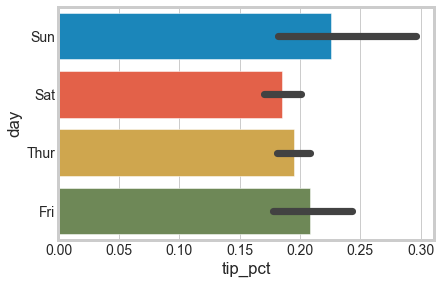

In [90]:
sns.barplot(x = 'tip_pct', y='day', data = tips,orient = 'h')
# 검은선 = 오차율의 크기를 나타냄, 클수록 가변성이 높아짐, 신뢰도가 떨어진다.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

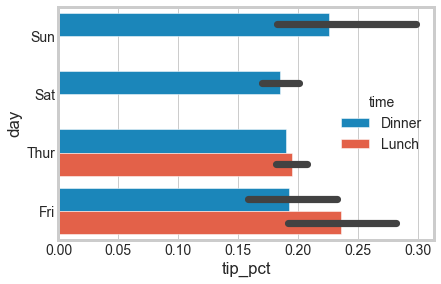

In [91]:
sns.barplot(x = 'tip_pct', y='day', hue = 'time', data = tips,orient = 'h')

<AxesSubplot:xlabel='size', ylabel='count'>

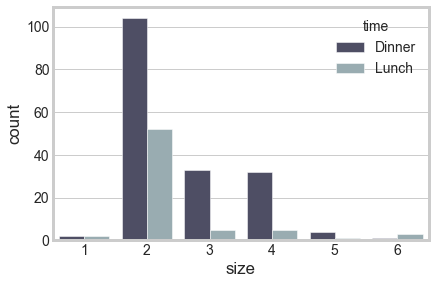

In [92]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot('size', hue = 'time', data = tips, palette = 'bone')

<AxesSubplot:xlabel='length', ylabel='Density'>

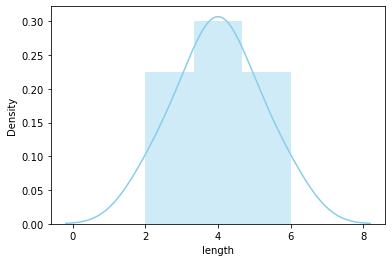

In [43]:
fish_multi =pd.read_csv('dataset/4_fm2.csv')
# 종류별 몸길이 데이터 추출
length_a = fish_multi.query('species == "A"')['length']
length_b = fish_multi.query('species =="B"')['length']
sns.distplot(length_a, color = "skyblue")
# 막대는 히스토그램, 선은 밀도를 나타냄, 저 안에 합은 1이 됨.

<AxesSubplot:xlabel='length'>

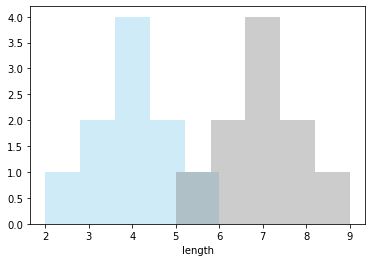

In [44]:
sns.distplot(length_a, bins = 5, color = 'skyblue', kde = False) #kernel density estimation
sns.distplot(length_b, bins = 5, color ='gray', kde = False)

<AxesSubplot:xlabel='species', ylabel='length'>

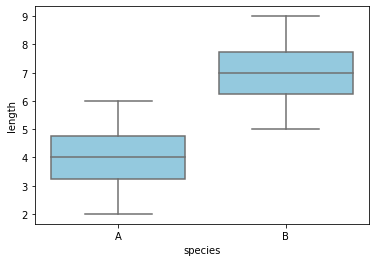

In [46]:
sns.boxplot(x='species', y = 'length', data = fish_multi, color = 'skyblue')

In [47]:
#바이올린 플롯
#상자 대신 히스토그램을 세로로 세워서 배치한 상자그림, 어느 부분에 데이터가 집중되어 있는지 정보 추가

<AxesSubplot:xlabel='species', ylabel='length'>

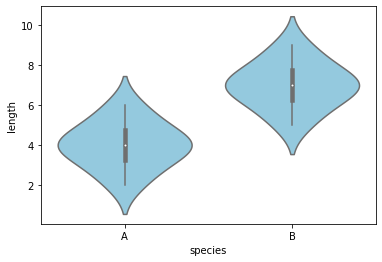

In [48]:
sns.violinplot(x = 'species', y='length', data = fish_multi, color = 'skyblue')

In [50]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


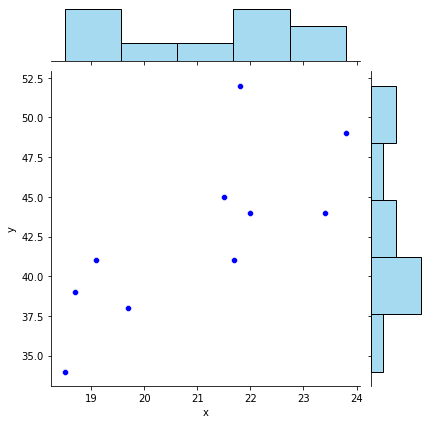

In [53]:
sns.jointplot(cov_data.x, cov_data.y,
             joint_kws ={'color':'blue'},
             marginal_kws = {'color': 'skyblue'})

In [54]:
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


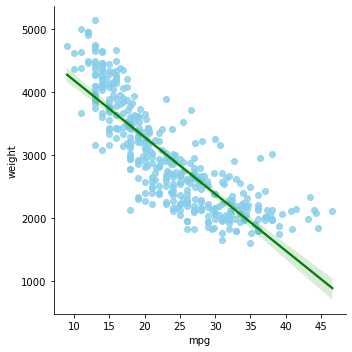

In [59]:
sns.lmplot(x = 'mpg', y = 'weight', data = df_auto, scatter_kws ={'color':'skyblue'}, line_kws ={'color':'green'})
#kws = keyword as 
# 밑에 초록선은 전체 자료의 오차를 최소로 하는 일차방정식 선을 나타낸 것이다.

<AxesSubplot:xlabel='mpg', ylabel='weight'>

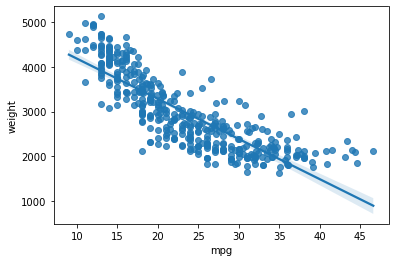

In [60]:
sns.regplot(x = 'mpg', y = 'weight', data = df_auto, fit_reg = True)

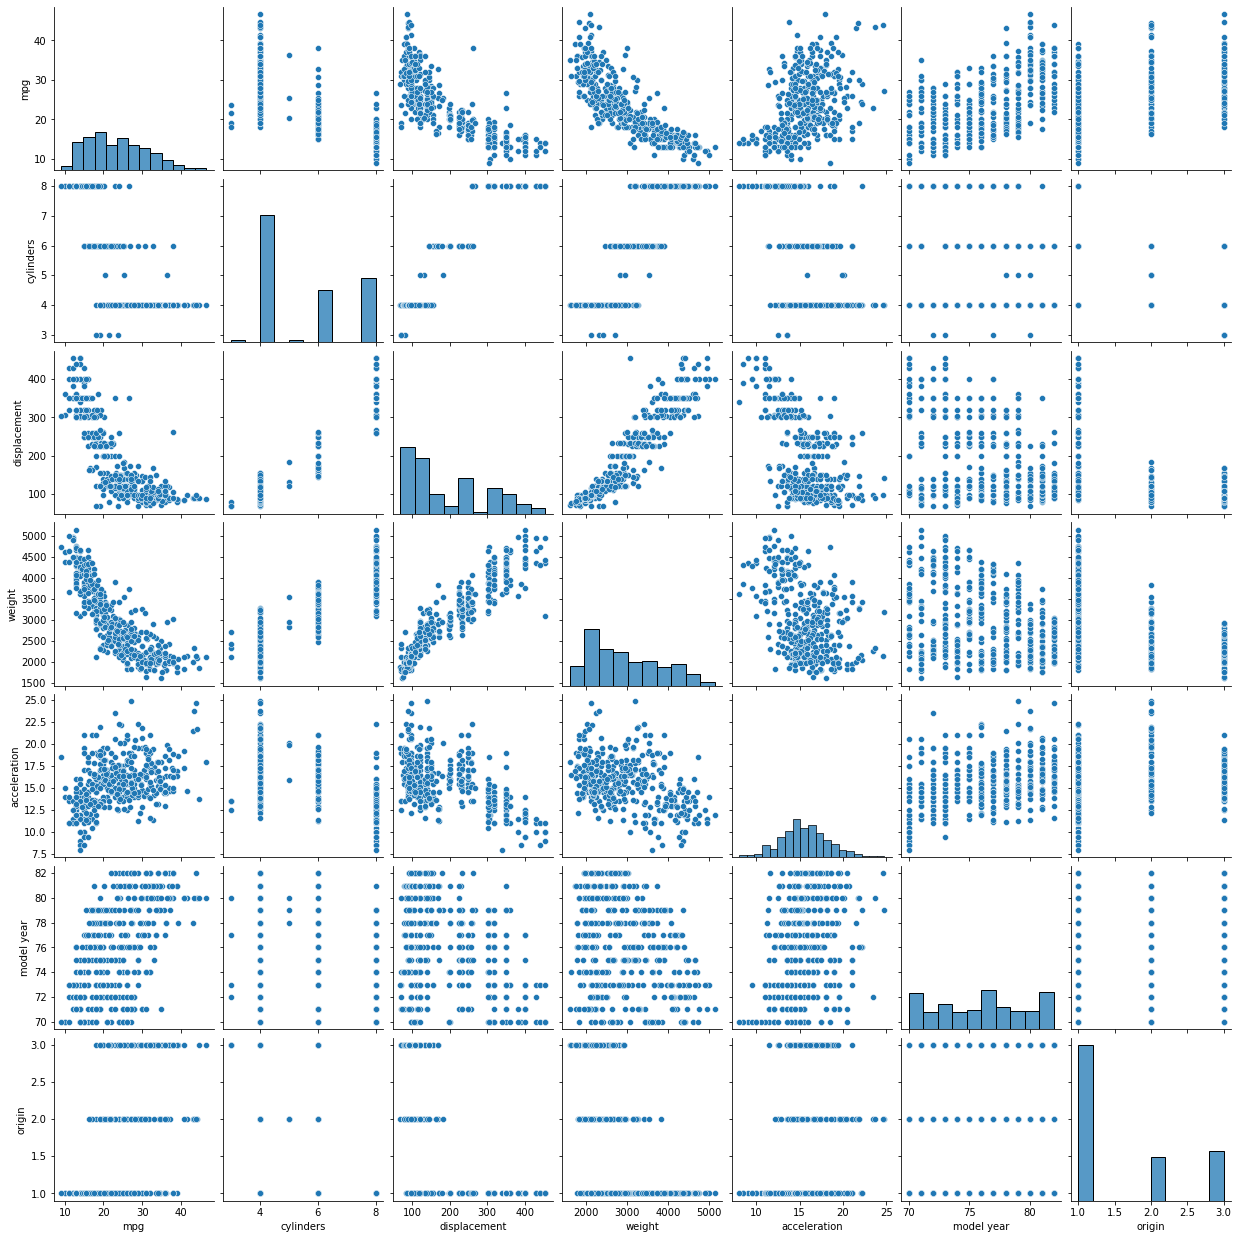

In [61]:
sns.pairplot(df_auto, palette='gray')

Text(0.5, 1.0, 'Heatmap od the Dataset')

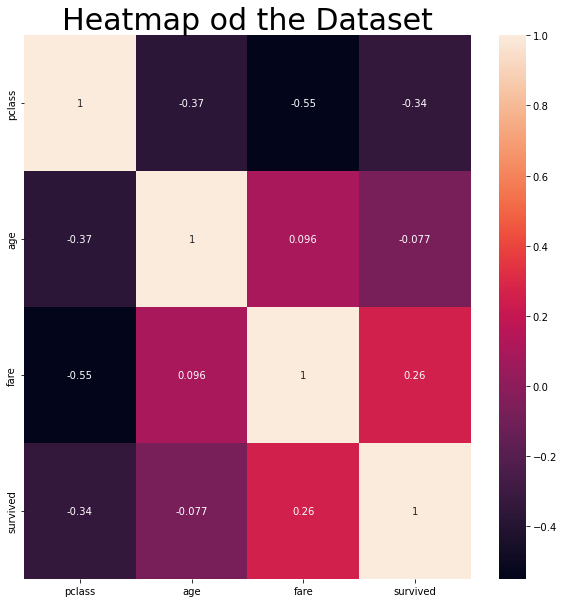

In [63]:
t_df = sns.load_dataset('titanic')
plt.figure(figsize=(10,10))
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot = True)
plt.title('Heatmap od the Dataset', fontsize = 30)

In [66]:
table = t_df.pivot_table(index = ['sex'],
                        columns = ['class'],
                        values = ['survived'],
                        aggfunc = 'mean')

<AxesSubplot:xlabel='None-class', ylabel='sex'>

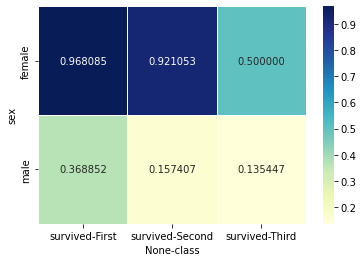

In [67]:
sns.heatmap(table,
           annot=True, fmt = 'f',
           cmap = 'YlGnBu',
           linewidth = .5,
           cbar = True)